<a href="https://colab.research.google.com/github/bekku/portfolio/blob/master/CNN%E2%86%922%E5%B1%A4NN%E3%81%B8%E3%81%AE%E8%92%B8%E7%95%99-2020/06/06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [0]:
def load_cifar10(batch=128):
    train_loader = DataLoader(
        datasets.CIFAR10('./data',
                         train=True,
                         download=True,
                         transform=transforms.Compose([
                             transforms.ToTensor(),
                             transforms.Normalize(
                                [0.5, 0.5, 0.5],  # RGB 平均
                                [0.5, 0.5, 0.5]   # RGB 標準偏差
                                )
                         ])),
        batch_size=batch,
        shuffle=True
    )

    test_loader = DataLoader(
        datasets.CIFAR10('./data',
                         train=False,
                         download=True,
                         transform=transforms.Compose([
                             transforms.ToTensor(),
                             transforms.Normalize(
                                 [0.5, 0.5, 0.5],  # RGB 平均
                                 [0.5, 0.5, 0.5]  # RGB 標準偏差
                             )
                         ])),
        batch_size=batch,
    )

    return {'train': train_loader, 'test': test_loader}


def load_MNIST(batch=128, intensity=1.0):
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data',
                       train=True,
                       download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x * intensity)
                       ])),
        batch_size=batch,
        shuffle=True)

    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data',
                       train=False,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x * intensity)
                       ])),
        batch_size=batch,
        shuffle=True)

    return {'train': train_loader, 'test': test_loader}





Files already downloaded and verified
Files already downloaded and verified
Training log: 1 epoch (128 / 50000 train. data). Loss: 2.307032346725464
Training log: 1 epoch (11648 / 50000 train. data). Loss: 2.2991673946380615
Training log: 1 epoch (23168 / 50000 train. data). Loss: 2.302773952484131
Training log: 1 epoch (34688 / 50000 train. data). Loss: 2.3026812076568604
Training log: 1 epoch (46208 / 50000 train. data). Loss: 2.2993578910827637
0.1192
0.1197
Training log: 2 epoch (128 / 50000 train. data). Loss: 2.301820993423462
Training log: 2 epoch (11648 / 50000 train. data). Loss: 2.301571846008301
Training log: 2 epoch (23168 / 50000 train. data). Loss: 2.299187660217285
Training log: 2 epoch (34688 / 50000 train. data). Loss: 2.295593023300171
Training log: 2 epoch (46208 / 50000 train. data). Loss: 2.2957537174224854
0.19484
0.1967
Training log: 3 epoch (128 / 50000 train. data). Loss: 2.2910361289978027
Training log: 3 epoch (11648 / 50000 train. data). Loss: 2.285605907440

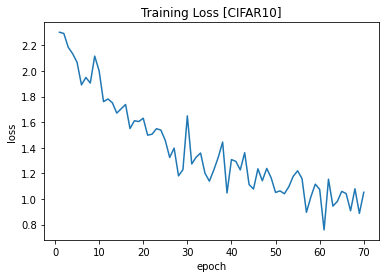

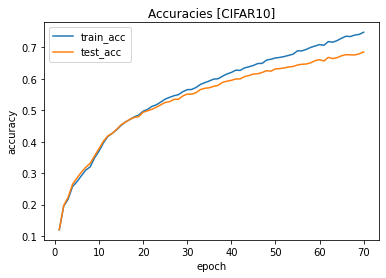

In [3]:
import matplotlib.pyplot as plt
class MyCNN2(torch.nn.Module):
    def __init__(self):
        super(MyCNN2, self).__init__()
#         self.conv1 = torch.nn.Conv2d(3,  # チャネル入力
#                                      6,  # チャンネル出力
#                                      5,  # カーネルサイズ
#                                      1,  # ストライド (デフォルトは1)
#                                      0,  # パディング (デフォルトは0)
#                                      )
        self.conv1 = torch.nn.Conv2d(3, 32, 3, 1, 0)
        self.conv2 = torch.nn.Conv2d(32, 32, 3)
        self.conv3 = torch.nn.Conv2d(32, 64, 3)
        self.conv4 = torch.nn.Conv2d(64, 64, 3)
        
        self.dropout1 = torch.nn.Dropout2d(p=0.25)
        self.dropout2 = torch.nn.Dropout2d(p=0.5)

        self.pool = torch.nn.MaxPool2d(2, 2)  # カーネルサイズ, ストライド

        self.fc1 = torch.nn.Linear(64 * 5 * 5, 512)  # 入力サイズ, 出力サイズ
        self.fc2 = torch.nn.Linear(512, 10)

        
        
# （入力チャネル）×（出力チャネル）が畳み込みフィルタの数になり、これらはネットワークが構築された段階でランダムに初期化されます。

    def forward(self, x):
        #reluに畳み込み層ぶちこんでて草生える。
        x = f.relu(self.conv1(x))
        x = f.relu(self.conv2(x))
        x = self.pool(x)
        x = self.dropout1(x)
        
        x = f.relu(self.conv3(x))
        x = f.relu(self.conv4(x))
        x = self.pool(x)
        x = self.dropout1(x)
        x = x.view(-1, 64 * 5 * 5)
        x = f.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)

        return x

# class AlexNet(torch.nn.Module):
 
#     def __init__(self, num_classes):
#         super(AlexNet, self).__init__()
#         self.features = torch.nn.Sequential(
#             torch.nn.Conv2d(3, 64, kernel_size=3, padding=1),
#             torch.nn.ReLU(inplace=True),
#             torch.nn.MaxPool2d(kernel_size=2, stride=2),
#             torch.nn.Conv2d(64, 192, kernel_size=5, padding=2),
#             torch.nn.ReLU(inplace=True),
#             torch.nn.MaxPool2d(kernel_size=2, stride=2),
#             torch.nn.Conv2d(192, 384, kernel_size=3, padding=1),
#             torch.nn.ReLU(inplace=True),
#             torch.nn.Conv2d(384, 256, kernel_size=3, padding=1),
#             torch.nn.ReLU(inplace=True),
#             torch.nn.Conv2d(256, 256, kernel_size=3, padding=1),
#             torch.nn.ReLU(inplace=True),
#             torch.nn.MaxPool2d(kernel_size=2, stride=2),
#         )
#         self.classifier = torch.nn.Sequential(
#             torch.nn.Dropout(),
#             torch.nn.Linear(256 * 4 * 4, 4096),
#             torch.nn.ReLU(inplace=True),
#             torch.nn.Dropout(),
#             torch.nn.Linear(4096, 4096),
#             torch.nn.ReLU(inplace=True),
#             torch.nn.Linear(4096, num_classes),
#         )
 
#     def forward(self, x):
#         x = self.features(x)
#         x = x.view(x.size(0), 256 * 4 * 4)
#         x = self.classifier(x)
#         return x
   
        
if __name__ == '__main__':
    epoch = 70

    loader = load_cifar10()


    net: MyCNN2 = MyCNN2()
    criterion = torch.nn.CrossEntropyLoss()  # ロスの計算
    optimizer = torch.optim.SGD(params=net.parameters(), lr=0.001, momentum=0.9)
    
    # もしGPUが使えるなら使う
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net.to(device)


    history = {
        'train_loss': [],
        'train_acc': [],
        'test_acc': []
    }

    for e in range(epoch):
        
        ################################### 学習 #################################
        
        net.train()
        loss = None
        for i, (images, labels) in enumerate(loader['train']):
            images = images.to(device)  # to GPU?
            labels = labels.to(device)
            optimizer.zero_grad()
            output = net(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

            if i % 90 == 0:
                print('Training log: {} epoch ({} / 50000 train. data). Loss: {}'.format(e + 1,
                                                                                         (i + 1) * 128,
                                                                                         loss.item())
                      )


        history['train_loss'].append(loss.item())

        
        
        ################################### 推論 #################################
        
        
        net.eval()
        correct = 0
        with torch.no_grad():
            for i, (images, labels) in enumerate(loader['train']):
                images = images.to(device)  # to GPU?
                labels = labels.to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                correct += (predicted == labels).sum().item()

        acc = float(correct / 50000)
        print(acc)
        history['train_acc'].append(acc)

        correct = 0
        with torch.no_grad():
            for i, (images, labels) in enumerate(loader['test']):
                images = images.to(device)  # to GPU?
                labels = labels.to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                correct += (predicted == labels).sum().item()

        acc = float(correct / 10000)
        print(acc)
        history['test_acc'].append(acc)
        
    #====== 保存 =======
    torch.save(net.state_dict(), 'teacher_model_weight.pth')

    # 結果をプロット
    plt.figure()
    plt.plot(range(1, epoch+1), history['train_loss'])
    plt.title('Training Loss [CIFAR10]')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.savefig('cifar10_loss.png')
    
    
    plt.figure()
    plt.plot(range(1, epoch + 1), history['train_acc'], label='train_acc')
    plt.plot(range(1, epoch + 1), history['test_acc'], label='test_acc')
    plt.title('Accuracies [CIFAR10]')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.savefig('cifar10_acc.png')

In [0]:
#####ドロップアウトを除いた推論用モデル#######


class MyCNN3(torch.nn.Module):
    def __init__(self):
        super(MyCNN3, self).__init__()
#         self.conv1 = torch.nn.Conv2d(3,  # チャネル入力
#                                      6,  # チャンネル出力
#                                      5,  # カーネルサイズ
#                                      1,  # ストライド (デフォルトは1)
#                                      0,  # パディング (デフォルトは0)
#                                      )
        self.conv1 = torch.nn.Conv2d(3, 32, 3, 1, 0)
        self.conv2 = torch.nn.Conv2d(32, 32, 3)
        self.conv3 = torch.nn.Conv2d(32, 64, 3)
        self.conv4 = torch.nn.Conv2d(64, 64, 3)
        
        self.dropout1 = torch.nn.Dropout2d(p=0.25)
        self.dropout2 = torch.nn.Dropout2d(p=0.5)

        self.pool = torch.nn.MaxPool2d(2, 2)  # カーネルサイズ, ストライド

        self.fc1 = torch.nn.Linear(64 * 5 * 5, 512)  # 入力サイズ, 出力サイズ
        self.fc2 = torch.nn.Linear(512, 10)

        
        
# （入力チャネル）×（出力チャネル）が畳み込みフィルタの数になり、これらはネットワークが構築された段階でランダムに初期化されます。

    def forward(self, x):
        #reluに畳み込み層ぶちこんでて草生える。
        x = f.relu(self.conv1(x))
        x = f.relu(self.conv2(x))
        x = self.pool(x)
        
        x = f.relu(self.conv3(x))
        x = f.relu(self.conv4(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 5 * 5)
        x = f.relu(self.fc1(x))
        x = self.fc2(x)

        return x

In [41]:
torch.cuda.is_available() 

True

In [0]:
def distillation_loss(Mini_model,Max_model):
    #学習済みの大きなモデルのsoftmaxを通す前のLogitsをMax_modelの引数とする。
    #学習中の小さなモデルのsoftmaxを通す前のlogitsをMini_modelの引数とする。
    #ans=f.mse_loss(Mini_model,Max_model)
    ans=f.mse_loss(Mini_model,Max_model)
    return ans

In [43]:
# ====== 保存 =======
# torch.save(net.state_dict(), 'teacher_model_weight.pth')


Tnet: MyCNN3 = MyCNN3()
    
# 保存したモデルのパラメータを読み込む
param = torch.load('teacher_model_weight.pth')

# 保存したモデルにパラメータを当てはめる
Tnet.load_state_dict(param)

<All keys matched successfully>

**通常NN**

Files already downloaded and verified
Files already downloaded and verified
Training log: 1 epoch (128 / 50000 train. data). Loss: 2.3179731369018555
Training log: 1 epoch (11648 / 50000 train. data). Loss: 1.7048763036727905
Training log: 1 epoch (23168 / 50000 train. data). Loss: 1.6387486457824707
Training log: 1 epoch (34688 / 50000 train. data). Loss: 1.6086976528167725
Training log: 1 epoch (46208 / 50000 train. data). Loss: 1.4022159576416016
Test loss (avg): 1.4967425300598145, Accuracy: 0.4789
Training log: 2 epoch (128 / 50000 train. data). Loss: 1.415174961090088
Training log: 2 epoch (11648 / 50000 train. data). Loss: 1.520485281944275
Training log: 2 epoch (23168 / 50000 train. data). Loss: 1.4905726909637451
Training log: 2 epoch (34688 / 50000 train. data). Loss: 1.3259505033493042
Training log: 2 epoch (46208 / 50000 train. data). Loss: 1.5202486515045166
Test loss (avg): 1.494954673576355, Accuracy: 0.4859
Training log: 3 epoch (128 / 50000 train. data). Loss: 1.552822

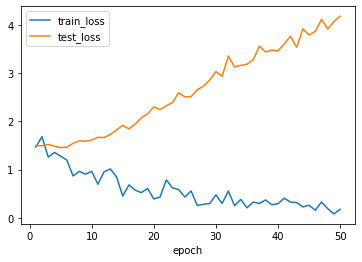

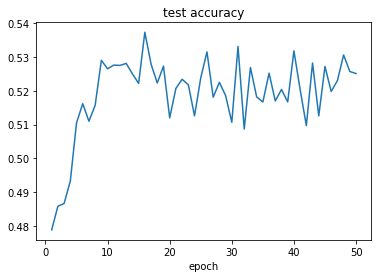

In [44]:
import torch
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


class MyNet(torch.nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
#         self.fc1 = torch.nn.Linear(32 * 32 * 3, 10)
        self.fc1 = torch.nn.Linear(32 * 32 * 3, 1024)
        self.fc2 = torch.nn.Linear(1024, 10)

    def forward(self, x):
#         x = self.fc1(x)
#         x = torch.sigmoid(x)
#         x = self.fc2(x)
        
        x = f.relu(self.fc1(x))
        x = self.fc2(x)

        #画像ということもあり、シグモイドよりもRELUの方が精度高い
        
        return f.log_softmax(x, dim=1)

if __name__ == '__main__':
    # 学習回数
    epoch = 50

    # 学習結果の保存用
    history = {
        'train_loss': [],
        'test_loss': [],
        'test_acc': [],
    }

    # ネットワークを構築
    net: torch.nn.Module = MyNet()

    # MNISTのデータローダーを取得
    loaders = load_cifar10()

    optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001)
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net.to(device)

    for e in range(epoch):

        """ Training Part"""
        loss = None
        # 学習開始 (再開)
        net.train(True)  # 引数は省略可能
        for i, (data, target) in enumerate(loaders['train']):
            data = data.to(device)  # to GPU?
            target = target.to(device)
#             max_model_outputs = Tnet(data)
            data = data.view(-1, 32 * 32 * 3)
            optimizer.zero_grad()
            output = net(data)
            loss = f.nll_loss(output, target)
#             loss = distillation_loss(output, max_model_outputs)
            loss.backward()
            optimizer.step()

            if i % 90 == 0:
                print('Training log: {} epoch ({} / 50000 train. data). Loss: {}'.format(e+1,
                                                                                         (i+1)*128,
                                                                                         loss.item())
                      )
        history['train_loss'].append(loss)
        
        """ Test Part """
        # 学習のストップ
        net.eval()  # または net.train(False) でも良い
        test_loss = 0
        correct = 0

        with torch.no_grad():
            for data, target in loaders['test']:
                data = data.to(device)  # to GPU?
                target = target.to(device)
                data = data.view(-1, 32 * 32 * 3)
                output = net(data)
                test_loss += f.nll_loss(output, target, reduction='sum').item()
                #テスト部分のロスは全て足して、最後に平均を取ることで、その学習(epoch)でのロスとしています。
                
                pred = output.argmax(dim=1, keepdim=True)
                #softmaxの確率出力の中で一番大きいニューロンのインデックスを取得
                
                correct += pred.eq(target.view_as(pred)).sum().item()
                #eqっていうのは、同じ値だとTrueをとる。

        test_loss /= 10000

        print('Test loss (avg): {}, Accuracy: {}'.format(test_loss,
                                                         correct / 10000))

        history['test_loss'].append(test_loss)
        history['test_acc'].append(correct / 10000)
        
    #====== 保存 =======
    torch.save(net.state_dict(), 'weight_NN_gc.pth')
    

    # 結果の出力と描画
    print(history)
    plt.figure()
    plt.plot(range(1, epoch+1), history['train_loss'], label='train_loss')
    plt.plot(range(1, epoch+1), history['test_loss'], label='test_loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.savefig('loss.png')

    plt.figure()
    plt.plot(range(1, epoch+1), history['test_acc'])
    plt.title('test accuracy')
    plt.xlabel('epoch')
    plt.savefig('test_acc.png')

Training log: 3 epoch (23168 / 50000 train. data). Loss: 1.7005014419555664
Training log: 3 epoch (34688 / 50000 train. data). Loss: 1.6652530431747437
Training log: 3 epoch (46208 / 50000 train. data). Loss: 1.6148232221603394
Test loss (avg): 1.38559228515625, Accuracy: 0.5052
Training log: 4 epoch (128 / 50000 train. data). Loss: 1.7805817127227783
Training log: 4 epoch (11648 / 50000 train. data). Loss: 1.7336387634277344
Training log: 4 epoch (23168 / 50000 train. data). Loss: 1.5354456901550293
Training log: 4 epoch (34688 / 50000 train. data). Loss: 1.5611542463302612
Training log: 4 epoch (46208 / 50000 train. data). Loss: 1.660578966140747
Test loss (avg): 1.3411638435363769, Accuracy: 0.5264
Training log: 5 epoch (128 / 50000 train. data). Loss: 1.4069949388504028
Training log: 5 epoch (11648 / 50000 train. data). Loss: 1.283648133277893
Training log: 5 epoch (23168 / 50000 train. data). Loss: 1.5089713335037231
Training log: 5 epoch (34688 / 50000 train. data). Loss: 1.16453

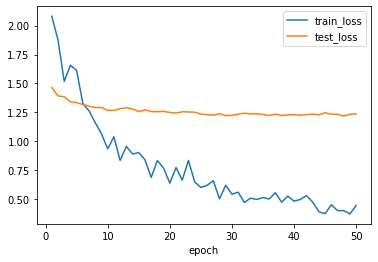

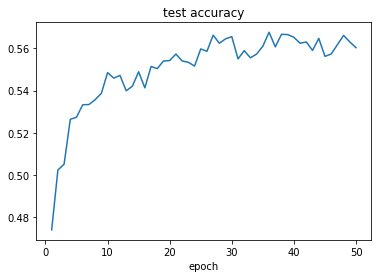

In [45]:
import torch
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


class MyNet(torch.nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
#        self.fc1 = torch.nn.Linear(32 * 32 * 3, 10)
        self.fc1 = torch.nn.Linear(32 * 32 * 3, 1024)
        self.fc2 = torch.nn.Linear(1024, 10)

    def forward(self, x):
#         x = self.fc1(x)
#         x = torch.sigmoid(x)
#         x = self.fc2(x)
        
        x = f.relu(self.fc1(x))
        x = self.fc2(x)

        return x

if __name__ == '__main__':
    # 学習回数
    epoch = 50

    # 学習結果の保存用
    history = {
        'train_loss': [],
        'test_loss': [],
        'test_acc': [],
    }

    # ネットワークを構築
    net: torch.nn.Module = MyNet()

    # MNISTのデータローダーを取得
    loaders = load_cifar10()

    optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001)

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net.to(device)
    Tnet.to(device)

    for e in range(epoch):

        """ Training Part"""
        loss = None
        # 学習開始 (再開)
        net.train(True)  # 引数は省略可能
        for i, (data, target) in enumerate(loaders['train']):
            
            data = data.to(device)  # to GPU?
            target = target.to(device)
            max_model_outputs = Tnet(data)

            data = data.view(-1, 32 * 32 * 3)
            
            optimizer.zero_grad()
            output = net(data)
#             loss = f.nll_loss(output, target)
            loss = distillation_loss(output,max_model_outputs)
            loss.backward()
            optimizer.step()
            
#             optimizer.zero_grad()
#             output = net(data)
#             loss = f.nll_loss(f.log_softmax(output, dim=1), target)
#             loss.backward()
#             optimizer.step()
            

            if i % 90 == 0:
                print('Training log: {} epoch ({} / 50000 train. data). Loss: {}'.format(e+1,
                                                                                         (i+1)*128,
                                                                                         loss.item())
                      )
        history['train_loss'].append(loss)
        
        """ Test Part """
        # 学習のストップ
        net.eval()  # または net.train(False) でも良い
        test_loss = 0
        correct = 0

        with torch.no_grad():
            for data, target in loaders['test']:
                data = data.to(device)  # to GPU?
                target = target.to(device)
                data = data.view(-1, 32 * 32 * 3)
                output = net(data)
                test_loss += f.nll_loss(f.log_softmax(output, dim=1), target, reduction='sum').item()
                #テスト部分のロスは全て足して、最後に平均を取ることで、その学習(epoch)でのロスとしています。
                
                pred = output.argmax(dim=1, keepdim=True)
                #softmaxの確率出力の中で一番大きいニューロンのインデックスを取得
                
                correct += pred.eq(target.view_as(pred)).sum().item()
                #eqっていうのは、同じ値だとTrueをとる。

        test_loss /= 10000

        print('Test loss (avg): {}, Accuracy: {}'.format(test_loss,
                                                         correct / 10000))

        history['test_loss'].append(test_loss)
        history['test_acc'].append(correct / 10000)
    
    #====== 保存 =======
    torch.save(net.state_dict(), 'weight_distillationNN_gc.pth')

    # 結果の出力と描画
    print(history)
    plt.figure()
    plt.plot(range(1, epoch+1), history['train_loss'], label='train_loss')
    plt.plot(range(1, epoch+1), history['test_loss'], label='test_loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.savefig('loss.png')

    plt.figure()
    plt.plot(range(1, epoch+1), history['test_acc'])
    plt.title('test accuracy')
    plt.xlabel('epoch')
    plt.savefig('test_acc.png')

Training log: 4 epoch (34688 / 50000 train. data). Loss: 1.2597301006317139
Training log: 4 epoch (46208 / 50000 train. data). Loss: 1.280426025390625
Test loss (avg): 1.3359144353866577, Accuracy: 0.5262
Training log: 5 epoch (128 / 50000 train. data). Loss: 1.0619409084320068
Training log: 5 epoch (11648 / 50000 train. data). Loss: 1.0885905027389526
Training log: 5 epoch (23168 / 50000 train. data). Loss: 1.0088083744049072
Training log: 5 epoch (34688 / 50000 train. data). Loss: 1.2269073724746704
Training log: 5 epoch (46208 / 50000 train. data). Loss: 1.275286316871643
Test loss (avg): 1.2947766540527343, Accuracy: 0.5408
Training log: 6 epoch (128 / 50000 train. data). Loss: 1.297997236251831
Training log: 6 epoch (11648 / 50000 train. data). Loss: 1.2189624309539795
Training log: 6 epoch (23168 / 50000 train. data). Loss: 1.1380897760391235
Training log: 6 epoch (34688 / 50000 train. data). Loss: 1.1141806840896606
Training log: 6 epoch (46208 / 50000 train. data). Loss: 1.0553

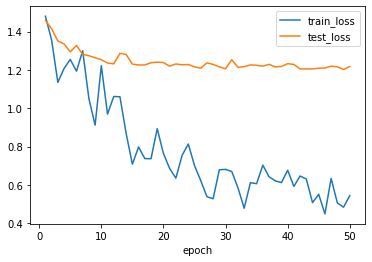

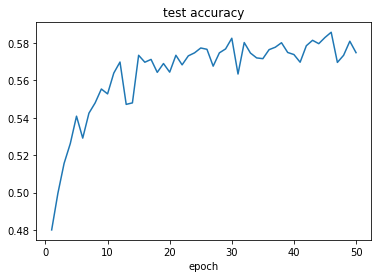

In [46]:
import torch
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


class MyNet(torch.nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
#        self.fc1 = torch.nn.Linear(32 * 32 * 3, 10)
        self.fc1 = torch.nn.Linear(32 * 32 * 3, 1024)
        self.fc2 = torch.nn.Linear(1024, 10)

    def forward(self, x):
#         x = self.fc1(x)
#         x = torch.sigmoid(x)
#         x = self.fc2(x)
        
        x = f.relu(self.fc1(x))
        x = self.fc2(x)

        return x

if __name__ == '__main__':
    # 学習回数
    epoch = 50

    # 学習結果の保存用
    history = {
        'train_loss': [],
        'test_loss': [],
        'test_acc': [],
    }

    # ネットワークを構築
    net: torch.nn.Module = MyNet()

    # MNISTのデータローダーを取得
    loaders = load_cifar10()

    optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001)

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net.to(device)
    Tnet.to(device)

    for e in range(epoch):

        """ Training Part"""
        loss = None
        # 学習開始 (再開)
        net.train(True)  # 引数は省略可能
        for i, (data, target) in enumerate(loaders['train']):
            data = data.to(device)  # to GPU?
            target = target.to(device)
            Tnet.to(device)
            max_model_outputs = Tnet(data)
            data = data.view(-1, 32 * 32 * 3)
            
            optimizer.zero_grad()
            output = net(data)
#             loss = f.nll_loss(output, target)
            loss = distillation_loss(output,max_model_outputs)
            loss.backward()
            optimizer.step()
            
            optimizer.zero_grad()
            output = net(data)
            loss = f.nll_loss(f.log_softmax(output, dim=1), target)
            loss.backward()
            optimizer.step()
            

            if i % 90 == 0:
                print('Training log: {} epoch ({} / 50000 train. data). Loss: {}'.format(e+1,
                                                                                         (i+1)*128,
                                                                                         loss.item())
                      )
        history['train_loss'].append(loss)
        
        """ Test Part """
        # 学習のストップ
        net.eval()  # または net.train(False) でも良い
        test_loss = 0
        correct = 0

        with torch.no_grad():
            for data, target in loaders['test']:
                data = data.to(device)  # to GPU?
                target = target.to(device)
                data = data.view(-1, 32 * 32 * 3)
                output = net(data)
                test_loss += f.nll_loss(f.log_softmax(output, dim=1), target, reduction='sum').item()
                #テスト部分のロスは全て足して、最後に平均を取ることで、その学習(epoch)でのロスとしています。
                
                pred = output.argmax(dim=1, keepdim=True)
                #softmaxの確率出力の中で一番大きいニューロンのインデックスを取得
                
                correct += pred.eq(target.view_as(pred)).sum().item()
                #eqっていうのは、同じ値だとTrueをとる。

        test_loss /= 10000

        print('Test loss (avg): {}, Accuracy: {}'.format(test_loss,
                                                         correct / 10000))

        history['test_loss'].append(test_loss)
        history['test_acc'].append(correct / 10000)
    
    #====== 保存 =======
    torch.save(net.state_dict(), 'weight_distillationNN2_gc.pth')

    # 結果の出力と描画
    print(history)
    plt.figure()
    plt.plot(range(1, epoch+1), history['train_loss'], label='train_loss')
    plt.plot(range(1, epoch+1), history['test_loss'], label='test_loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.savefig('loss.png')

    plt.figure()
    plt.plot(range(1, epoch+1), history['test_acc'])
    plt.title('test accuracy')
    plt.xlabel('epoch')
    plt.savefig('test_acc.png')

In [47]:
#NNの保存ネットワーク


distillation_net: torch.nn.Module = MyNet()
    
NN: torch.nn.Module = MyNet()
    
distillation_net2: torch.nn.Module = MyNet()
    
# 保存したモデルのパラメータを読み込む
param2 = torch.load('weight_distillationNN_gc.pth')
param3 = torch.load('weight_NN_gc.pth')
param4 = torch.load('weight_distillationNN2_gc.pth')


# 保存したモデルにパラメータを当てはめる
distillation_net.load_state_dict(param2)
NN.load_state_dict(param3)
distillation_net2.load_state_dict(param4)

<All keys matched successfully>

In [49]:
print(Tnet)
print(param)
print(distillation_net)
print(param2)
print(NN)
print(param3)
print(distillation_net2)
print(param4)

MyCNN3(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1600, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)
OrderedDict([('conv1.weight', tensor([[[[-0.1687, -0.1699, -0.0443],
          [ 0.0337,  0.1241, -0.0337],
          [ 0.0716, -0.1144,  0.0994]],

         [[ 0.1514, -0.0106,  0.0916],
          [ 0.1079, -0.1364,  0.1300],
          [-0.2173, -0.3131, -0.3231]],

         [[ 0.0888,  0.2423,  0.0313],
          [ 0.1031,  0.0491,  0.2293],
          [-0.0977, -0.0407, -0.0783]]],


        [[[ 0.1972,  0.2018,  0.1519],
          [ 0.124

In [51]:
# ====== 保存 =======
# torch.save(net.state_dict(), 'teacher_model_weight.pth')
#to(device)から戻した感じかな。

Tnet: MyCNN3 = MyCNN3()
    
# 保存したモデルのパラメータを読み込む
param = torch.load('teacher_model_weight.pth')

# 保存したモデルにパラメータを当てはめる
Tnet.load_state_dict(param)

<All keys matched successfully>

**モデル検証**

教師モデル

In [52]:
import time
loader = load_cifar10()
t1 = time.time()

correct = 0
with torch.no_grad():
    for images, labels in loader['test']:
        outputs = Tnet(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

acc = float(correct / 10000)
print(acc)


t2 = time.time()
elapsed_time = t2-t1
print(f"経過時間：{elapsed_time}")

Files already downloaded and verified
Files already downloaded and verified
0.6854
経過時間：8.915922164916992


通常NN

In [53]:
import time
loader = load_cifar10()
t1 = time.time()

correct = 0
with torch.no_grad():
    for images, labels in loader['test']:
        data = images.view(-1, 32 * 32 * 3)
        outputs = NN(data)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

acc = float(correct / 10000)
print(acc)


t2 = time.time()
elapsed_time = t2-t1
print(f"経過時間：{elapsed_time}")

Files already downloaded and verified
Files already downloaded and verified
0.5251
経過時間：3.074653148651123


蒸留モデル1

In [54]:
import time
loader = load_cifar10()
t1 = time.time()


correct = 0
with torch.no_grad():
    for images, labels in loader['test']:
        data = images.view(-1, 32 * 32 * 3)
        outputs = distillation_net(data)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

acc = float(correct / 10000)
print(acc)


t2 = time.time()
elapsed_time = t2-t1
print(f"経過時間：{elapsed_time}")

Files already downloaded and verified
Files already downloaded and verified
0.5603
経過時間：3.0584280490875244


蒸留モデル2(hard+soft)

In [55]:
import time
loader = load_cifar10()
t1 = time.time()


correct = 0
with torch.no_grad():
    for images, labels in loader['test']:
        data = images.view(-1, 32 * 32 * 3)
        outputs = distillation_net2(data)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

acc = float(correct / 10000)
print(acc)


t2 = time.time()
elapsed_time = t2-t1
print(f"経過時間：{elapsed_time}")

Files already downloaded and verified
Files already downloaded and verified
0.5747
経過時間：3.061567783355713
